## Imports

In [195]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### Programs

In [ ]:
def mrate (m):
    rate = (m[1]/(m[1] + m[0])) * 100
    print('30 Day Mortality Rate (pct):', rate)
    
def rrate (r):
    rate = (r[1]/(r[1] + r[0])) * 100
    print('30 Day Readmission Rate (pct):', rate)

## Data Prep

In [196]:
df = pd.read_csv('procedures.csv')

In [197]:
df.shape

(51402, 41)

In [198]:
df.head()

personid                           encounterid  \
0  012e7384-a301-4dcc-9b65-55b973fd323f  745b5292-7fbd-45a5-a220-5678b9665f5e   
1  017f15fa-bc84-488f-ab4c-8648f1f06e94  29013b3b-a508-4d8e-b5ed-b0c02408ede9   
2  03393ec8-6d41-4e7c-a103-ccbd1a9d1e19  aed18cec-c00c-4a6d-8706-c1c21c970100   
3  04d1d98a-5a87-44fc-9372-308bc4ebc964  8ca906ac-0956-408f-a725-5c35a307c09e   
4  051c8032-abe2-4d7c-ad7e-06421b300b48  7e1dfe1e-d039-4e4e-9040-acb6218e90a0   

            index_date  pre_albumin  early_albumin  late_albumin  no_albumin  \
0  2021-02-25 14:47:36            1              1             1           0   
1  2021-02-01 15:21:00            0              0             0           1   
2  2017-10-14 01:40:00            0              0             0           1   
3  2018-11-16 12:00:00            0              0             0           1   
4  2016-02-04 02:54:00            0              0             0           1   

   ICU   LOS_days  zip_code bed_size admissiontype       payer  \
0    1   7.501667         9  200-299      Accident       Other   
1    0  16.273611         6  300-499     Emergency    Medicare   
2    0  23.962500         7   >=1000     Emergency    Medicaid   
3    0   7.340278         1   >=1000      Elective    Medicare   
4    0  10.945139         9   >=1000     Emergency  Commercial   

   90_day_mortality  90_day_readmission  days_until_readmission  \
0                 0                 0.0                     NaN   
1                 0                 1.0               16.276481   
2                 0                 1.0               40.343750   
3                 0                 0.0              196.361806   
4                 0                 0.0              167.573611   

   hospital_free_days   age age_group  sex   race  CCI  preop_hypotension  \
0                  74  51.0   50 - 64    M  White    0                  1   
1                  64  74.0       65+    M  White    5                  0   
2                  50   1.0      < 18    M  White    0                  1   
3                  83  83.0       65+    M  Black    4                  0   
4                  79   NaN       NaN  NaN    NaN    0                  0   

   postop_hypotension  MAKE_90  preop_albumin preop_albumin_classification  \
0                   1        1            NaN                      Unknown   
1                   0        1            NaN                      Unknown   
2                   0        1            NaN                      Unknown   
3                   0        1            NaN                      Unknown   
4                   0        0            3.7                       Normal   

   postop_albumin  preop_inr preop_inr_classification  preop_scr  \
0             NaN        NaN                  Unknown       1.66   
1             NaN        NaN                  Unknown        NaN   
2             NaN        NaN                  Unknown        NaN   
3             NaN        NaN                  Unknown        NaN   
4             NaN        NaN                  Unknown       0.80   

  preop_scr_classification  transfusion  non_elective  vasopressor  NEWS  \
0                     High            0           1.0            1     8   
1                  Unknown            0           1.0            0     1   
2                  Unknown            0           1.0            0     6   
3                  Unknown            0           0.0            1     6   
4                   Normal            0           1.0            0     5   

   bl_hypertension  preop_MAP        eGFR eGFR_classification  LVR  
0                0          0   47.010980      Kidney Disease    0  
1                1          0         NaN                 NaN    0  
2                0          0  219.920238              Normal    0  
3                0          0         NaN                 NaN    1  
4                0          0  119.872691              Normal    0

In [199]:
df.columns

Index(['personid', 'encounterid', 'index_date', 'pre_albumin', 'early_albumin',
       'late_albumin', 'no_albumin', 'ICU', 'LOS_days', 'zip_code', 'bed_size',
       'admissiontype', 'payer', '90_day_mortality', '90_day_readmission',
       'days_until_readmission', 'hospital_free_days', 'age', 'age_group',
       'sex', 'race', 'CCI', 'preop_hypotension', 'postop_hypotension',
       'MAKE_90', 'preop_albumin', 'preop_albumin_classification',
       'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr',
       'preop_scr_classification', 'transfusion', 'non_elective',
       'vasopressor', 'NEWS', 'bl_hypertension', 'preop_MAP', 'eGFR',
       'eGFR_classification', 'LVR'],
      dtype='object')

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51402 entries, 0 to 51401
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   personid                      51402 non-null  object 
 1   encounterid                   51402 non-null  object 
 2   index_date                    51402 non-null  object 
 3   pre_albumin                   51402 non-null  int64  
 4   early_albumin                 51402 non-null  int64  
 5   late_albumin                  51402 non-null  int64  
 6   no_albumin                    51402 non-null  int64  
 7   ICU                           51402 non-null  int64  
 8   LOS_days                      51402 non-null  float64
 9   zip_code                      51402 non-null  int64  
 10  bed_size                      51402 non-null  object 
 11  admissiontype                 51030 non-null  object 
 12  payer                         51402 non-null  object 
 13  9

In [201]:
df.isnull().sum()

personid                            0
encounterid                         0
index_date                          0
pre_albumin                         0
early_albumin                       0
late_albumin                        0
no_albumin                          0
ICU                                 0
LOS_days                            0
zip_code                            0
bed_size                            0
admissiontype                     372
payer                               0
90_day_mortality                    0
90_day_readmission               4556
days_until_readmission          20529
hospital_free_days                  0
age                               799
age_group                         799
sex                               821
race                             3273
CCI                                 0
preop_hypotension                   0
postop_hypotension                  0
MAKE_90                             0
preop_albumin                   35606
preop_albumi

In [202]:
df.early_albumin.value_counts()

0    49306
1     2096
Name: early_albumin, dtype: int64

## Look at outcomes distributions between patients who did and didn't receive albumin within 24 hrs

In [203]:
df[df['early_albumin'] == 1].LOS_days.describe()

count    2096.000000
mean       20.118692
std        27.520327
min         0.111111
25%         7.273958
50%        13.094097
75%        23.273160
max       532.831250
Name: LOS_days, dtype: float64

In [204]:
df[df['early_albumin'] == 0].LOS_days.describe()

count    49306.000000
mean        15.883797
std         22.536854
min          0.000000
25%          6.241667
50%         10.324381
75%         17.763047
max        742.281944
Name: LOS_days, dtype: float64

In [212]:
df[df['early_albumin'] == 1].hospital_free_days.describe()

count    2096.000000
mean       43.042939
std        32.312925
min         0.000000
25%         3.000000
50%        51.000000
75%        74.000000
max        90.000000
Name: hospital_free_days, dtype: float64

In [213]:
df[df['early_albumin'] == 0].hospital_free_days.describe()

count    49306.000000
mean        55.365169
std         30.156335
min          0.000000
25%         32.000000
50%         69.000000
75%         80.000000
max         90.000000
Name: hospital_free_days, dtype: float64

In [205]:
om = df[df['early_albumin'] == 1]['90_day_mortality'].value_counts()
print(om)
mrate(om)

0    1668
1     428
Name: 90_day_mortality, dtype: int64
30 Day Mortality Rate (pct): 20.419847328244277


In [206]:
om1 = df[df['early_albumin'] == 0]['90_day_mortality'].value_counts()
print(om1)
mrate(om1)

0    45178
1     4128
Name: 90_day_mortality, dtype: int64
30 Day Mortality Rate (pct): 8.372206222366446


In [208]:
ir = df[df['early_albumin'] == 1]['90_day_readmission'].value_counts()
print(ir)
mrate(ir)

0.0    1026
1.0     642
Name: 90_day_readmission, dtype: int64
30 Day Mortality Rate (pct): 38.489208633093526


In [209]:
ir1 = df[df['early_albumin'] == 0]['90_day_readmission'].value_counts()
print(ir1)
mrate(ir1)

0.0    29532
1.0    15646
Name: 90_day_readmission, dtype: int64
30 Day Mortality Rate (pct): 34.63190048253575


In [59]:
df.head()

personid                           encounterid  \
0  012e7384-a301-4dcc-9b65-55b973fd323f  745b5292-7fbd-45a5-a220-5678b9665f5e   
1  017f15fa-bc84-488f-ab4c-8648f1f06e94  29013b3b-a508-4d8e-b5ed-b0c02408ede9   
2  03393ec8-6d41-4e7c-a103-ccbd1a9d1e19  aed18cec-c00c-4a6d-8706-c1c21c970100   
3  04d1d98a-5a87-44fc-9372-308bc4ebc964  8ca906ac-0956-408f-a725-5c35a307c09e   
4  051c8032-abe2-4d7c-ad7e-06421b300b48  7e1dfe1e-d039-4e4e-9040-acb6218e90a0   

            index_date  pre_albumin  early_albumin  late_albumin  no_albumin  \
0  2021-02-25 14:47:36            1              1             1           0   
1  2021-02-01 15:21:00            0              0             0           1   
2  2017-10-14 01:40:00            0              0             0           1   
3  2018-11-16 12:00:00            0              0             0           1   
4  2016-02-04 02:54:00            0              0             0           1   

   ICU   LOS_days  zip_code bed_size admissiontype       payer  \
0    1   7.501667         9  200-299      Accident       Other   
1    0  16.273611         6  300-499     Emergency    Medicare   
2    0  23.962500         7   >=1000     Emergency    Medicaid   
3    0   7.340278         1   >=1000      Elective    Medicare   
4    0  10.945139         9   >=1000     Emergency  Commercial   

   90_day_mortality  90_day_readmission  days_until_readmission  \
0                 0                 0.0                     NaN   
1                 0                 1.0               16.276481   
2                 0                 1.0               40.343750   
3                 0                 0.0              196.361806   
4                 0                 0.0              167.573611   

   hospital_free_days   age age_group  sex   race  CCI  preop_hypotension  \
0                  74  51.0   50 - 64    M  White    0                  1   
1                  64  74.0       65+    M  White    5                  0   
2                  50   1.0      < 18    M  White    0                  1   
3                  83  83.0       65+    M  Black    4                  0   
4                  79   NaN       NaN  NaN    NaN    0                  0   

   postop_hypotension  MAKE_90  preop_albumin preop_albumin_classification  \
0                   1        1            NaN                      Unknown   
1                   0        1            NaN                      Unknown   
2                   0        1            NaN                      Unknown   
3                   0        1            NaN                      Unknown   
4                   0        0            3.7                       Normal   

   postop_albumin  preop_inr preop_inr_classification  preop_scr  \
0             NaN        NaN                  Unknown       1.66   
1             NaN        NaN                  Unknown        NaN   
2             NaN        NaN                  Unknown        NaN   
3             NaN        NaN                  Unknown        NaN   
4             NaN        NaN                  Unknown       0.80   

  preop_scr_classification  transfusion  non_elective  vasopressor  NEWS  \
0                     High            0           1.0            1     8   
1                  Unknown            0           1.0            0     1   
2                  Unknown            0           1.0            0     6   
3                  Unknown            0           0.0            1     6   
4                   Normal            0           1.0            0     5   

   bl_hypertension  preop_MAP        eGFR eGFR_classification  LVR  
0                0          0   47.010980      Kidney Disease    0  
1                1          0         NaN                 NaN    0  
2                0          0  219.920238              Normal    0  
3                0          0         NaN                 NaN    1  
4                0          0  119.872691              Normal    0

In [60]:
print(df.columns.tolist())

['personid', 'encounterid', 'index_date', 'pre_albumin', 'early_albumin', 'late_albumin', 'no_albumin', 'ICU', 'LOS_days', 'zip_code', 'bed_size', 'admissiontype', 'payer', '90_day_mortality', '90_day_readmission', 'days_until_readmission', 'hospital_free_days', 'age', 'age_group', 'sex', 'race', 'CCI', 'preop_hypotension', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'vasopressor', 'NEWS', 'bl_hypertension', 'preop_MAP', 'eGFR', 'eGFR_classification', 'LVR']


In [61]:
df_a24 = df[['personid', 'encounterid', 'index_date', 'pre_albumin', 'early_albumin', 'late_albumin', 'no_albumin', 'ICU', 'LOS_days', 'zip_code', 'bed_size', 'admissiontype', 'payer', '90_day_mortality', '90_day_readmission', 'days_until_readmission', 'hospital_free_days', 'age', 'age_group', 'sex', 'race', 'CCI', 'preop_hypotension', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'vasopressor', 'NEWS', 'bl_hypertension', 'preop_MAP', 'eGFR', 'eGFR_classification', 'LVR']]

In [62]:
df_a24.head()

personid                           encounterid  \
0  012e7384-a301-4dcc-9b65-55b973fd323f  745b5292-7fbd-45a5-a220-5678b9665f5e   
1  017f15fa-bc84-488f-ab4c-8648f1f06e94  29013b3b-a508-4d8e-b5ed-b0c02408ede9   
2  03393ec8-6d41-4e7c-a103-ccbd1a9d1e19  aed18cec-c00c-4a6d-8706-c1c21c970100   
3  04d1d98a-5a87-44fc-9372-308bc4ebc964  8ca906ac-0956-408f-a725-5c35a307c09e   
4  051c8032-abe2-4d7c-ad7e-06421b300b48  7e1dfe1e-d039-4e4e-9040-acb6218e90a0   

            index_date  pre_albumin  early_albumin  late_albumin  no_albumin  \
0  2021-02-25 14:47:36            1              1             1           0   
1  2021-02-01 15:21:00            0              0             0           1   
2  2017-10-14 01:40:00            0              0             0           1   
3  2018-11-16 12:00:00            0              0             0           1   
4  2016-02-04 02:54:00            0              0             0           1   

   ICU   LOS_days  zip_code bed_size admissiontype       payer  \
0    1   7.501667         9  200-299      Accident       Other   
1    0  16.273611         6  300-499     Emergency    Medicare   
2    0  23.962500         7   >=1000     Emergency    Medicaid   
3    0   7.340278         1   >=1000      Elective    Medicare   
4    0  10.945139         9   >=1000     Emergency  Commercial   

   90_day_mortality  90_day_readmission  days_until_readmission  \
0                 0                 0.0                     NaN   
1                 0                 1.0               16.276481   
2                 0                 1.0               40.343750   
3                 0                 0.0              196.361806   
4                 0                 0.0              167.573611   

   hospital_free_days   age age_group  sex   race  CCI  preop_hypotension  \
0                  74  51.0   50 - 64    M  White    0                  1   
1                  64  74.0       65+    M  White    5                  0   
2                  50   1.0      < 18    M  White    0                  1   
3                  83  83.0       65+    M  Black    4                  0   
4                  79   NaN       NaN  NaN    NaN    0                  0   

   postop_hypotension  MAKE_90  preop_albumin preop_albumin_classification  \
0                   1        1            NaN                      Unknown   
1                   0        1            NaN                      Unknown   
2                   0        1            NaN                      Unknown   
3                   0        1            NaN                      Unknown   
4                   0        0            3.7                       Normal   

   postop_albumin  preop_inr preop_inr_classification  preop_scr  \
0             NaN        NaN                  Unknown       1.66   
1             NaN        NaN                  Unknown        NaN   
2             NaN        NaN                  Unknown        NaN   
3             NaN        NaN                  Unknown        NaN   
4             NaN        NaN                  Unknown       0.80   

  preop_scr_classification  transfusion  non_elective  vasopressor  NEWS  \
0                     High            0           1.0            1     8   
1                  Unknown            0           1.0            0     1   
2                  Unknown            0           1.0            0     6   
3                  Unknown            0           0.0            1     6   
4                   Normal            0           1.0            0     5   

   bl_hypertension  preop_MAP        eGFR eGFR_classification  LVR  
0                0          0   47.010980      Kidney Disease    0  
1                1          0         NaN                 NaN    0  
2                0          0  219.920238              Normal    0  
3                0          0         NaN                 NaN    1  
4                0          0  119.872691              Normal    0

In [63]:
#df.drop(columns=['personid', 'encounterid', 'albumin_24'], inplace=True)

In [64]:
df.shape

(51402, 41)

In [65]:
df.head()

personid                           encounterid  \
0  012e7384-a301-4dcc-9b65-55b973fd323f  745b5292-7fbd-45a5-a220-5678b9665f5e   
1  017f15fa-bc84-488f-ab4c-8648f1f06e94  29013b3b-a508-4d8e-b5ed-b0c02408ede9   
2  03393ec8-6d41-4e7c-a103-ccbd1a9d1e19  aed18cec-c00c-4a6d-8706-c1c21c970100   
3  04d1d98a-5a87-44fc-9372-308bc4ebc964  8ca906ac-0956-408f-a725-5c35a307c09e   
4  051c8032-abe2-4d7c-ad7e-06421b300b48  7e1dfe1e-d039-4e4e-9040-acb6218e90a0   

            index_date  pre_albumin  early_albumin  late_albumin  no_albumin  \
0  2021-02-25 14:47:36            1              1             1           0   
1  2021-02-01 15:21:00            0              0             0           1   
2  2017-10-14 01:40:00            0              0             0           1   
3  2018-11-16 12:00:00            0              0             0           1   
4  2016-02-04 02:54:00            0              0             0           1   

   ICU   LOS_days  zip_code bed_size admissiontype       payer  \
0    1   7.501667         9  200-299      Accident       Other   
1    0  16.273611         6  300-499     Emergency    Medicare   
2    0  23.962500         7   >=1000     Emergency    Medicaid   
3    0   7.340278         1   >=1000      Elective    Medicare   
4    0  10.945139         9   >=1000     Emergency  Commercial   

   90_day_mortality  90_day_readmission  days_until_readmission  \
0                 0                 0.0                     NaN   
1                 0                 1.0               16.276481   
2                 0                 1.0               40.343750   
3                 0                 0.0              196.361806   
4                 0                 0.0              167.573611   

   hospital_free_days   age age_group  sex   race  CCI  preop_hypotension  \
0                  74  51.0   50 - 64    M  White    0                  1   
1                  64  74.0       65+    M  White    5                  0   
2                  50   1.0      < 18    M  White    0                  1   
3                  83  83.0       65+    M  Black    4                  0   
4                  79   NaN       NaN  NaN    NaN    0                  0   

   postop_hypotension  MAKE_90  preop_albumin preop_albumin_classification  \
0                   1        1            NaN                      Unknown   
1                   0        1            NaN                      Unknown   
2                   0        1            NaN                      Unknown   
3                   0        1            NaN                      Unknown   
4                   0        0            3.7                       Normal   

   postop_albumin  preop_inr preop_inr_classification  preop_scr  \
0             NaN        NaN                  Unknown       1.66   
1             NaN        NaN                  Unknown        NaN   
2             NaN        NaN                  Unknown        NaN   
3             NaN        NaN                  Unknown        NaN   
4             NaN        NaN                  Unknown       0.80   

  preop_scr_classification  transfusion  non_elective  vasopressor  NEWS  \
0                     High            0           1.0            1     8   
1                  Unknown            0           1.0            0     1   
2                  Unknown            0           1.0            0     6   
3                  Unknown            0           0.0            1     6   
4                   Normal            0           1.0            0     5   

   bl_hypertension  preop_MAP        eGFR eGFR_classification  LVR  
0                0          0   47.010980      Kidney Disease    0  
1                1          0         NaN                 NaN    0  
2                0          0  219.920238              Normal    0  
3                0          0         NaN                 NaN    1  
4                0          0  119.872691              Normal    0

In [73]:
df.no_albumin.value_counts()

1    36153
0    15249
Name: no_albumin, dtype: int64

In [77]:
#def alb(row):
#    score = 0
#    if row['no_albumin'] == 0:
#        score += 1
#    return score

#df['albumin'] = df.apply(lambda row: alb(row), axis=1)

In [79]:
df.albumin.value_counts()

1    36153
0    15249
Name: albumin, dtype: int64

In [80]:
df.head()

personid                           encounterid  \
0  012e7384-a301-4dcc-9b65-55b973fd323f  745b5292-7fbd-45a5-a220-5678b9665f5e   
1  017f15fa-bc84-488f-ab4c-8648f1f06e94  29013b3b-a508-4d8e-b5ed-b0c02408ede9   
2  03393ec8-6d41-4e7c-a103-ccbd1a9d1e19  aed18cec-c00c-4a6d-8706-c1c21c970100   
3  04d1d98a-5a87-44fc-9372-308bc4ebc964  8ca906ac-0956-408f-a725-5c35a307c09e   
4  051c8032-abe2-4d7c-ad7e-06421b300b48  7e1dfe1e-d039-4e4e-9040-acb6218e90a0   

            index_date  pre_albumin  early_albumin  late_albumin  no_albumin  \
0  2021-02-25 14:47:36            1              1             1           0   
1  2021-02-01 15:21:00            0              0             0           1   
2  2017-10-14 01:40:00            0              0             0           1   
3  2018-11-16 12:00:00            0              0             0           1   
4  2016-02-04 02:54:00            0              0             0           1   

   ICU   LOS_days  zip_code bed_size admissiontype       payer  \
0    1   7.501667         9  200-299      Accident       Other   
1    0  16.273611         6  300-499     Emergency    Medicare   
2    0  23.962500         7   >=1000     Emergency    Medicaid   
3    0   7.340278         1   >=1000      Elective    Medicare   
4    0  10.945139         9   >=1000     Emergency  Commercial   

   90_day_mortality  90_day_readmission  days_until_readmission  \
0                 0                 0.0                     NaN   
1                 0                 1.0               16.276481   
2                 0                 1.0               40.343750   
3                 0                 0.0              196.361806   
4                 0                 0.0              167.573611   

   hospital_free_days   age age_group  sex   race  CCI  preop_hypotension  \
0                  74  51.0   50 - 64    M  White    0                  1   
1                  64  74.0       65+    M  White    5                  0   
2                  50   1.0      < 18    M  White    0                  1   
3                  83  83.0       65+    M  Black    4                  0   
4                  79   NaN       NaN  NaN    NaN    0                  0   

   postop_hypotension  MAKE_90  preop_albumin preop_albumin_classification  \
0                   1        1            NaN                      Unknown   
1                   0        1            NaN                      Unknown   
2                   0        1            NaN                      Unknown   
3                   0        1            NaN                      Unknown   
4                   0        0            3.7                       Normal   

   postop_albumin  preop_inr preop_inr_classification  preop_scr  \
0             NaN        NaN                  Unknown       1.66   
1             NaN        NaN                  Unknown        NaN   
2             NaN        NaN                  Unknown        NaN   
3             NaN        NaN                  Unknown        NaN   
4             NaN        NaN                  Unknown       0.80   

  preop_scr_classification  transfusion  non_elective  vasopressor  NEWS  \
0                     High            0           1.0            1     8   
1                  Unknown            0           1.0            0     1   
2                  Unknown            0           1.0            0     6   
3                  Unknown            0           0.0            1     6   
4                   Normal            0           1.0            0     5   

   bl_hypertension  preop_MAP        eGFR eGFR_classification  LVR  albumin  
0                0          0   47.010980      Kidney Disease    0        0  
1                1          0         NaN                 NaN    0        1  
2                0          0  219.920238              Normal    0        1  
3                0          0         NaN                 NaN    1        1  
4                0          0  119.872691              Normal    0        1

## Initialize PsmPy Class

In [82]:
psm = PsmPy(df, treatment= 'albumin', indx='encounterid', exclude = ['personid', 'index_date', 'pre_albumin', 'early_albumin', 'late_albumin', 'no_albumin', 'ICU', 'LOS_days', 'zip_code', 'bed_size', 'admissiontype', 'payer', '90_day_mortality', '90_day_readmission', 'days_until_readmission', 'hospital_free_days', 'age', 'age_group', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR'])

In [83]:
%%time
psm.logistic_ps(balance = True)

Wall time: 1min 54s


In [84]:
df_psm = psm.predicted_data

In [85]:
df_psm.head()

encounterid  CCI  preop_hypotension  vasopressor  \
0  745b5292-7fbd-45a5-a220-5678b9665f5e    0                  1            1   
1  9226fe26-3d9c-45e7-a5e2-cb3ea73c5612    1                  0            0   
2  d876535a-c09a-4db1-b3d4-361d3af60734    0                  0            0   
3  66500e5e-3f96-4777-bd80-f78871d210bb    0                  0            0   
4  f3cc07b4-8f88-4379-9a60-8973799e70c7    2                  0            1   

   NEWS  bl_hypertension  preop_MAP  propensity_score  propensity_logit  \
0     8                0          0          0.243944         -1.131176   
1     4                0          0          0.587635          0.354199   
2     0                0          0          0.719688          0.942915   
3     0                0          0          0.719688          0.942915   
4     4                0          0          0.479571         -0.081761   

   albumin  
0        0  
1        0  
2        0  
3        0  
4        0

## Plot the propensity score / propensity logits

In [86]:
%%time
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Wall time: 20h 22min 24s


C:\ProgramData\Anaconda3\lib\site-packages\psmpy\psmpy.py:347: UserWarning: Some values do not have a match
  warnings.warn('Some values do not have a match')


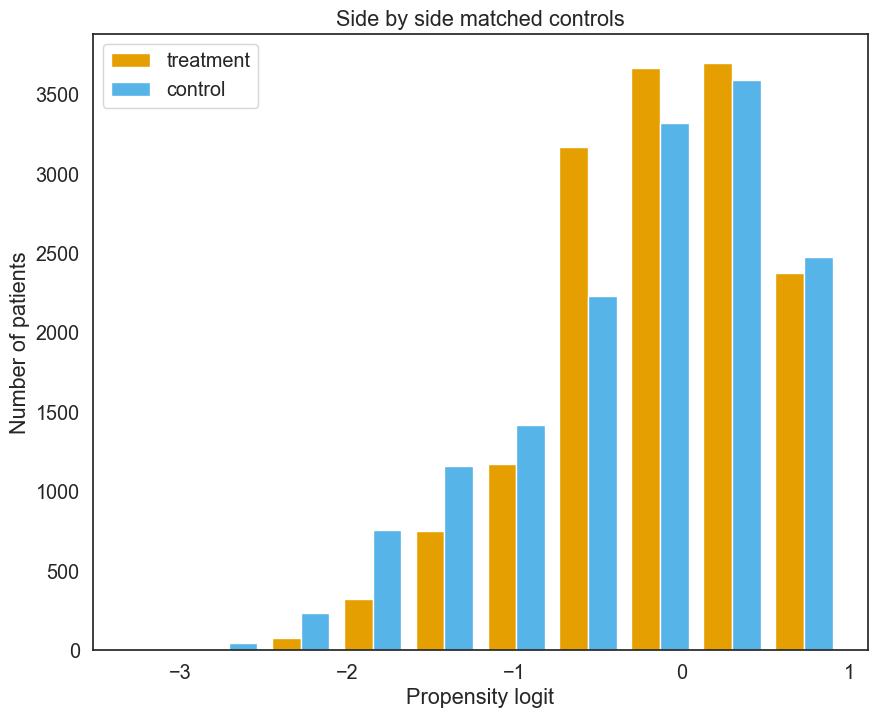

In [87]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], save=True)

## Plot the effect sizes

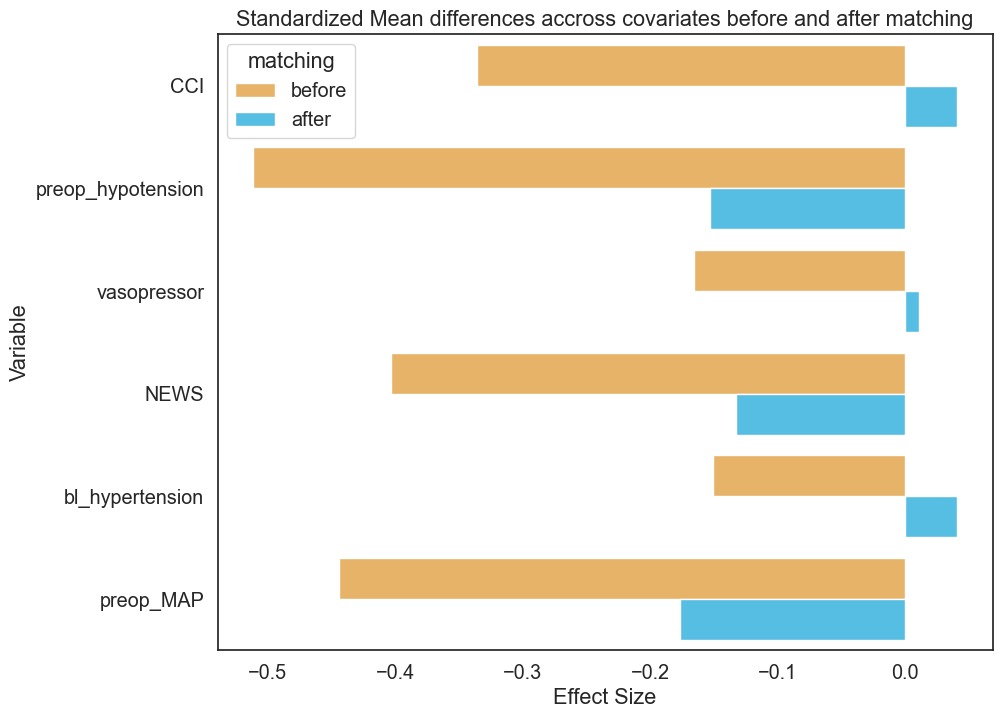

In [88]:
psm.effect_size_plot(save=False)

## Raw Dataframe

In [128]:
matched_df = psm.df_matched

In [129]:
matched_df.head()

encounterid  CCI  preop_hypotension  vasopressor  \
0  745b5292-7fbd-45a5-a220-5678b9665f5e    0                  1            1   
1  9226fe26-3d9c-45e7-a5e2-cb3ea73c5612    1                  0            0   
2  d876535a-c09a-4db1-b3d4-361d3af60734    0                  0            0   
3  66500e5e-3f96-4777-bd80-f78871d210bb    0                  0            0   
4  f3cc07b4-8f88-4379-9a60-8973799e70c7    2                  0            1   

   NEWS  bl_hypertension  preop_MAP  propensity_score  propensity_logit  \
0     8                0          0          0.243944         -1.131176   
1     4                0          0          0.587635          0.354199   
2     0                0          0          0.719688          0.942915   
3     0                0          0          0.719688          0.942915   
4     4                0          0          0.479571         -0.081761   

   albumin  
0        0  
1        0  
2        0  
3        0  
4        0

In [130]:
matched_df.shape

(30497, 10)

## Matched Ids

In [131]:
ids_df = psm.matched_ids
ids_df.head()

encounterid                            matched_ID
0  745b5292-7fbd-45a5-a220-5678b9665f5e  44b51c4e-708e-4059-800f-005d7008fff0
1  9226fe26-3d9c-45e7-a5e2-cb3ea73c5612  45ec4e79-a871-4514-ba83-68640e4da5b8
2  d876535a-c09a-4db1-b3d4-361d3af60734  652b8386-955a-4c4c-b664-520616bf1519
3  66500e5e-3f96-4777-bd80-f78871d210bb  713e140e-38cc-44ef-944a-f856bcc341db
4  f3cc07b4-8f88-4379-9a60-8973799e70c7  b6ce769d-87fa-47a5-9a51-b41d8fe1369d

## Effect sizes per variables

In [132]:
psm.effect_size

Variable matching  Effect Size
0                 CCI   before    -0.335451
1                 CCI    after     0.040246
2   preop_hypotension   before    -0.511575
3   preop_hypotension    after    -0.153156
4         vasopressor   before    -0.165590
5         vasopressor    after     0.010664
6                NEWS   before    -0.402957
7                NEWS    after    -0.132398
8     bl_hypertension   before    -0.150946
9     bl_hypertension    after     0.040762
10          preop_MAP   before    -0.444078
11          preop_MAP    after    -0.176929

## Explore Matched df

In [133]:
matched_df.head()

encounterid  CCI  preop_hypotension  vasopressor  \
0  745b5292-7fbd-45a5-a220-5678b9665f5e    0                  1            1   
1  9226fe26-3d9c-45e7-a5e2-cb3ea73c5612    1                  0            0   
2  d876535a-c09a-4db1-b3d4-361d3af60734    0                  0            0   
3  66500e5e-3f96-4777-bd80-f78871d210bb    0                  0            0   
4  f3cc07b4-8f88-4379-9a60-8973799e70c7    2                  0            1   

   NEWS  bl_hypertension  preop_MAP  propensity_score  propensity_logit  \
0     8                0          0          0.243944         -1.131176   
1     4                0          0          0.587635          0.354199   
2     0                0          0          0.719688          0.942915   
3     0                0          0          0.719688          0.942915   
4     4                0          0          0.479571         -0.081761   

   albumin  
0        0  
1        0  
2        0  
3        0  
4        0

In [134]:
matched_df.albumin.value_counts()

0    15249
1    15248
Name: albumin, dtype: int64

In [135]:
matched_df.shape

(30497, 10)

## Join Matched df with earlier df on encounterid to add outcome variables

In [136]:
f_df = matched_df.merge(df_a24, on='encounterid', how='left')

In [137]:
f_df.shape

(30497, 50)

In [138]:
f_df.head()

encounterid  CCI_x  preop_hypotension_x  \
0  745b5292-7fbd-45a5-a220-5678b9665f5e      0                    1   
1  9226fe26-3d9c-45e7-a5e2-cb3ea73c5612      1                    0   
2  d876535a-c09a-4db1-b3d4-361d3af60734      0                    0   
3  66500e5e-3f96-4777-bd80-f78871d210bb      0                    0   
4  f3cc07b4-8f88-4379-9a60-8973799e70c7      2                    0   

   vasopressor_x  NEWS_x  bl_hypertension_x  preop_MAP_x  propensity_score  \
0              1       8                  0            0          0.243944   
1              0       4                  0            0          0.587635   
2              0       0                  0            0          0.719688   
3              0       0                  0            0          0.719688   
4              1       4                  0            0          0.479571   

   propensity_logit  albumin                              personid  \
0         -1.131176        0  012e7384-a301-4dcc-9b65-55b973fd323f   
1          0.354199        0  05c8fa00-1952-4a70-b50e-af551c2d6e21   
2          0.942915        0  09b1c3e8-45c3-4702-8c30-676bd316e419   
3          0.942915        0  0aad16b9-b2db-4f86-86d1-ce55179e2501   
4         -0.081761        0  0c567c68-6c3b-48b3-9a63-377ae2669e2a   

            index_date  pre_albumin  early_albumin  late_albumin  no_albumin  \
0  2021-02-25 14:47:36            1              1             1           0   
1  2015-10-17 19:50:00            1              0             0           0   
2  2016-05-16 03:11:00            0              0             1           0   
3  2019-07-25 10:45:00            0              0             1           0   
4  2021-06-17 05:29:07            0              0             1           0   

   ICU   LOS_days  zip_code bed_size admissiontype       payer  \
0    1   7.501667         9  200-299      Accident       Other   
1    0   2.987500         1   >=1000     Emergency       Other   
2    1   5.770833         5  500-999     Emergency    Medicare   
3    1  11.174306         0  500-999     Emergency  Commercial   
4    1  12.611725         8  300-499     Emergency    Medicare   

   90_day_mortality  90_day_readmission  days_until_readmission  \
0                 0                 0.0                     NaN   
1                 1                 NaN                     NaN   
2                 0                 0.0              753.793750   
3                 0                 1.0               14.369444   
4                 1                 NaN                     NaN   

   hospital_free_days   age age_group sex     race  CCI_y  \
0                  74  51.0   50 - 64   M    White      0   
1                   0  71.0       65+   M  Unknown      1   
2                  81  68.0       65+   F    White      0   
3                  74  61.0   50 - 64   M    White      0   
4                   0  84.0       65+   M    Other      2   

   preop_hypotension_y  postop_hypotension  MAKE_90  preop_albumin  \
0                    1                   1        1            NaN   
1                    0                   0        1            1.1   
2                    0                   1        0            NaN   
3                    0                   1        1            NaN   
4                    0                   1        1            2.7   

  preop_albumin_classification  postop_albumin  preop_inr  \
0                      Unknown             NaN        NaN   
1                          Low             NaN        NaN   
2                      Unknown             NaN        NaN   
3                      Unknown             3.1        NaN   
4                          Low             1.6        NaN   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                  Unknown       1.66                     High            0   
1                  Unknown       4.15                     High            0   
2                  Unknown       0.60 

In [139]:
print(f_df.columns.tolist())

['encounterid', 'CCI_x', 'preop_hypotension_x', 'vasopressor_x', 'NEWS_x', 'bl_hypertension_x', 'preop_MAP_x', 'propensity_score', 'propensity_logit', 'albumin', 'personid', 'index_date', 'pre_albumin', 'early_albumin', 'late_albumin', 'no_albumin', 'ICU', 'LOS_days', 'zip_code', 'bed_size', 'admissiontype', 'payer', '90_day_mortality', '90_day_readmission', 'days_until_readmission', 'hospital_free_days', 'age', 'age_group', 'sex', 'race', 'CCI_y', 'preop_hypotension_y', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'vasopressor_y', 'NEWS_y', 'bl_hypertension_y', 'preop_MAP_y', 'eGFR', 'eGFR_classification', 'LVR']


In [140]:
f_df.drop(columns=['CCI_y', 'vasopressor_y', 'NEWS_y', 'bl_hypertension_y', 'preop_MAP_y'], inplace=True)

In [141]:
f_df.shape

(30497, 45)

In [142]:
f_df.rename(columns={'CCI_x': 'CCI', 'preop_hypotension_x': 'preop_hypotension', \
                    'vasopressor_x': 'vasopressor', 'NEWS_x': 'NEWS', \
                    'bl_hypertension_x': 'bl_hypertension', 'preop_MAP_x': 'preop_MAP'}, inplace=True)

In [143]:
print(f_df.columns.tolist())

['encounterid', 'CCI', 'preop_hypotension', 'vasopressor', 'NEWS', 'bl_hypertension', 'preop_MAP', 'propensity_score', 'propensity_logit', 'albumin', 'personid', 'index_date', 'pre_albumin', 'early_albumin', 'late_albumin', 'no_albumin', 'ICU', 'LOS_days', 'zip_code', 'bed_size', 'admissiontype', 'payer', '90_day_mortality', '90_day_readmission', 'days_until_readmission', 'hospital_free_days', 'age', 'age_group', 'sex', 'race', 'preop_hypotension_y', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR']


In [144]:
f_df.head()

encounterid  CCI  preop_hypotension  vasopressor  \
0  745b5292-7fbd-45a5-a220-5678b9665f5e    0                  1            1   
1  9226fe26-3d9c-45e7-a5e2-cb3ea73c5612    1                  0            0   
2  d876535a-c09a-4db1-b3d4-361d3af60734    0                  0            0   
3  66500e5e-3f96-4777-bd80-f78871d210bb    0                  0            0   
4  f3cc07b4-8f88-4379-9a60-8973799e70c7    2                  0            1   

   NEWS  bl_hypertension  preop_MAP  propensity_score  propensity_logit  \
0     8                0          0          0.243944         -1.131176   
1     4                0          0          0.587635          0.354199   
2     0                0          0          0.719688          0.942915   
3     0                0          0          0.719688          0.942915   
4     4                0          0          0.479571         -0.081761   

   albumin                              personid           index_date  \
0        0  012e7384-a301-4dcc-9b65-55b973fd323f  2021-02-25 14:47:36   
1        0  05c8fa00-1952-4a70-b50e-af551c2d6e21  2015-10-17 19:50:00   
2        0  09b1c3e8-45c3-4702-8c30-676bd316e419  2016-05-16 03:11:00   
3        0  0aad16b9-b2db-4f86-86d1-ce55179e2501  2019-07-25 10:45:00   
4        0  0c567c68-6c3b-48b3-9a63-377ae2669e2a  2021-06-17 05:29:07   

   pre_albumin  early_albumin  late_albumin  no_albumin  ICU   LOS_days  \
0            1              1             1           0    1   7.501667   
1            1              0             0           0    0   2.987500   
2            0              0             1           0    1   5.770833   
3            0              0             1           0    1  11.174306   
4            0              0             1           0    1  12.611725   

   zip_code bed_size admissiontype       payer  90_day_mortality  \
0         9  200-299      Accident       Other                 0   
1         1   >=1000     Emergency       Other                 1   
2         5  500-999     Emergency    Medicare                 0   
3         0  500-999     Emergency  Commercial                 0   
4         8  300-499     Emergency    Medicare                 1   

   90_day_readmission  days_until_readmission  hospital_free_days   age  \
0                 0.0                     NaN                  74  51.0   
1                 NaN                     NaN                   0  71.0   
2                 0.0              753.793750                  81  68.0   
3                 1.0               14.369444                  74  61.0   
4                 NaN                     NaN                   0  84.0   

  age_group sex     race  preop_hypotension_y  postop_hypotension  MAKE_90  \
0   50 - 64   M    White                    1                   1        1   
1       65+   M  Unknown                    0                   0        1   
2       65+   F    White                    0                   1        0   
3   50 - 64   M    White                    0                   1        1   
4       65+   M    Other                    0                   1        1   

   preop_albumin preop_albumin_classification  postop_albumin  preop_inr  \
0            NaN                      Unknown             NaN        NaN   
1            1.1                          Low             NaN        NaN   
2            NaN                      Unknown             NaN        NaN   
3            NaN                      Unknown             3.1        NaN   
4            2.7                          Low             1.6        NaN   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                  Unknown       1.66                     High            0   
1                  Unknown       4.15                     High            0   
2                  Unknown       0.60                   Normal            0   
3                  Unknown       1.18                   Normal            0   
4                  Unknow

In [145]:
f_df.albumin.value_counts()

0    15249
1    15248
Name: albumin, dtype: int64

In [151]:
f_df['albumin'] = np.where(f_df['no_albumin'] == 1, 0, 1)
f_df.head()

encounterid  CCI  preop_hypotension  vasopressor  \
0  745b5292-7fbd-45a5-a220-5678b9665f5e    0                  1            1   
1  9226fe26-3d9c-45e7-a5e2-cb3ea73c5612    1                  0            0   
2  d876535a-c09a-4db1-b3d4-361d3af60734    0                  0            0   
3  66500e5e-3f96-4777-bd80-f78871d210bb    0                  0            0   
4  f3cc07b4-8f88-4379-9a60-8973799e70c7    2                  0            1   

   NEWS  bl_hypertension  preop_MAP  propensity_score  propensity_logit  \
0     8                0          0          0.243944         -1.131176   
1     4                0          0          0.587635          0.354199   
2     0                0          0          0.719688          0.942915   
3     0                0          0          0.719688          0.942915   
4     4                0          0          0.479571         -0.081761   

   albumin                              personid           index_date  \
0        1  012e7384-a301-4dcc-9b65-55b973fd323f  2021-02-25 14:47:36   
1        1  05c8fa00-1952-4a70-b50e-af551c2d6e21  2015-10-17 19:50:00   
2        1  09b1c3e8-45c3-4702-8c30-676bd316e419  2016-05-16 03:11:00   
3        1  0aad16b9-b2db-4f86-86d1-ce55179e2501  2019-07-25 10:45:00   
4        1  0c567c68-6c3b-48b3-9a63-377ae2669e2a  2021-06-17 05:29:07   

   pre_albumin  early_albumin  late_albumin  no_albumin  ICU   LOS_days  \
0            1              1             1           0    1   7.501667   
1            1              0             0           0    0   2.987500   
2            0              0             1           0    1   5.770833   
3            0              0             1           0    1  11.174306   
4            0              0             1           0    1  12.611725   

   zip_code bed_size admissiontype       payer  90_day_mortality  \
0         9  200-299      Accident       Other                 0   
1         1   >=1000     Emergency       Other                 1   
2         5  500-999     Emergency    Medicare                 0   
3         0  500-999     Emergency  Commercial                 0   
4         8  300-499     Emergency    Medicare                 1   

   90_day_readmission  days_until_readmission  hospital_free_days   age  \
0                 0.0                     NaN                  74  51.0   
1                 NaN                     NaN                   0  71.0   
2                 0.0              753.793750                  81  68.0   
3                 1.0               14.369444                  74  61.0   
4                 NaN                     NaN                   0  84.0   

  age_group sex     race  preop_hypotension_y  postop_hypotension  MAKE_90  \
0   50 - 64   M    White                    1                   1        1   
1       65+   M  Unknown                    0                   0        1   
2       65+   F    White                    0                   1        0   
3   50 - 64   M    White                    0                   1        1   
4       65+   M    Other                    0                   1        1   

   preop_albumin preop_albumin_classification  postop_albumin  preop_inr  \
0            NaN                      Unknown             NaN        NaN   
1            1.1                          Low             NaN        NaN   
2            NaN                      Unknown             NaN        NaN   
3            NaN                      Unknown             3.1        NaN   
4            2.7                          Low             1.6        NaN   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                  Unknown       1.66                     High            0   
1                  Unknown       4.15                     High            0   
2                  Unknown       0.60                   Normal            0   
3                  Unknown       1.18                   Normal            0   
4                  Unknow

In [147]:
#def alb(row):
#    score = 0
#    if row['no_albumin'] == 1:
#        score += 1
#    return score

# df['albumin'] = df.apply(lambda row: alb(row), axis=1)

In [152]:
f_df.albumin.value_counts()

1    15249
0    15248
Name: albumin, dtype: int64

In [153]:
f_df['albumin'].equals(df['no_albumin'])

False

In [154]:
print(f_df.columns.tolist())

['encounterid', 'CCI', 'preop_hypotension', 'vasopressor', 'NEWS', 'bl_hypertension', 'preop_MAP', 'propensity_score', 'propensity_logit', 'albumin', 'personid', 'index_date', 'pre_albumin', 'early_albumin', 'late_albumin', 'no_albumin', 'ICU', 'LOS_days', 'zip_code', 'bed_size', 'admissiontype', 'payer', '90_day_mortality', '90_day_readmission', 'days_until_readmission', 'hospital_free_days', 'age', 'age_group', 'sex', 'race', 'preop_hypotension_y', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR']


In [157]:
f_df = f_df[['encounterid', 'CCI', 'preop_hypotension', 'vasopressor', 'NEWS', 'bl_hypertension', 'preop_MAP', 'propensity_score', 'propensity_logit', 'albumin', 'personid', 'index_date', 'pre_albumin', 'early_albumin', 'late_albumin', 'albumin', 'no_albumin', 'ICU', 'LOS_days', 'zip_code', 'bed_size', 'admissiontype', 'payer', '90_day_mortality', '90_day_readmission', 'days_until_readmission', 'hospital_free_days', 'age', 'age_group', 'sex', 'race', 'preop_hypotension_y', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR']]

In [158]:
f_df.head(100)

encounterid  CCI  preop_hypotension  vasopressor  \
0   745b5292-7fbd-45a5-a220-5678b9665f5e    0                  1            1   
1   9226fe26-3d9c-45e7-a5e2-cb3ea73c5612    1                  0            0   
2   d876535a-c09a-4db1-b3d4-361d3af60734    0                  0            0   
3   66500e5e-3f96-4777-bd80-f78871d210bb    0                  0            0   
4   f3cc07b4-8f88-4379-9a60-8973799e70c7    2                  0            1   
5   eee3a8aa-e192-4f91-9e60-b0ab5bbd6cf5    1                  0            0   
6   3fde9161-e6df-4ce2-bc54-ec9896b43988    3                  1            0   
7   e4465f48-fbef-4d28-9942-0610abfb0cf6    2                  0            0   
8   bb5fe0ba-a8ec-429e-aa55-5259943286cc    2                  1            0   
9   429f0cb3-72d0-4a5b-b8f9-a019539a2703    2                  0            0   
10  f62220ef-ed55-49a2-9061-93aab252246f    4                  0            0   
11  419cce14-caa7-4b35-9447-0fa7537a5349    6                  0            0   
12  4f9a4e00-1add-4be5-b37d-4b4ee8cb5ad6    0                  0            0   
13  577fcf53-3510-4c54-8d0a-8e3003f06bac    0                  0            0   
14  2015e15f-81e5-4de2-bedf-18b862ef5fe2    1                  0            0   
15  5bb5ee25-1a13-4066-bf87-d56ff472df02    0                  0            0   
16  37d5de69-19c5-44f8-8edf-038153765f6f    0                  0            1   
17  246fe30e-8fec-4380-9765-14ad0a163034    9                  1            0   
18  37dbd38d-41c3-4346-b70b-7d337383a24f    4                  0            0   
19  3439835c-bde7-4923-bd07-f276b02b119e    6                  0            0   
20  7639a3f6-af2e-40b6-a469-37498e8ba1cd    1                  0            0   
21  993f48dc-d7f7-49fd-ad9e-02e35d66db43    7                  0            1   
22  33356fed-eebf-4c91-b352-33bc71629d6b    8                  0            0   
23  28f02bea-4468-4f25-9b1e-a15e29cb790f    2                  0            0   
24  5b1b669f-944e-4148-9837-eee6b863aeda    3                  0            0   
25  720aca00-463f-4fa5-a49d-c0b468ecd524    1                  1            0   
26  4d27baf9-8a4b-4fbf-bd12-07427cb1bb45    6                  0            0   
27  a0b6770a-c805-4ab5-9d34-8acbc7efe8d5    2                  0            0   
28  ddacda07-4570-49fe-aa81-055ce846f1eb    0                  0            1   
29  1c83af17-cd64-45e9-88ea-afa8a79c12fe    4                  0            0   
30  9c911a79-c050-4a1d-8d2f-55e186ab2619    2                  0            1   
31  bd5dac97-a24a-41ac-8b21-07da4af2e871   10                  1            0   
32  232c818c-4900-4024-834e-b1818a462cd6    6                  1            0   
33  1a5fe4a3-50ef-487b-a01b-38a206dff2a8    6                  0            0   
34  6d893f10-b41c-48ab-9de7-bb85671247e5    6                  0            0   
35  725c9b99-be23-40f7-9495-fd1776b94025    6                  0            0   
36  2e2e1d95-7f53-4503-9fa9-5e9ccbb481cb    0                  0            0   
37  0efa5373-bf5e-43ef-95fc-79864e7f3747    8                  0            1   
38  6b9e06cd-1143-492e-a771-f1d2bc1cf79f    6                  0            0   
39  7344513c-7258-44d9-94d6-e8edef248e52    0                  1            1   
40  37834b4f-7d41-4bf0-8901-c633a939e778    6                  0            0   
41  6a4d171b-5ac8-4bdd-87d1-662c2202f573    5                  1            0   
42  531331f8-9069-4f85-9b97-cb1d80fd690d    2                  1            1   
43  6decb158-b384-4f6c-9618-ca7a4bb13f57    4                  0            1   
44  29943c70-acda-4e84-94bc-147937dfb863    8                  1            0   
45  b2ed5de5-cecc-47db-8e5f-d0f050a20793    0                  0            0   
46  f0ed42eb-fc5d-4a98-9715-89c829bcfd7b    0                  1            0   
47  ccc937e1-6d18-44fa-bc82-c906afefd9d5    8                  0            0   
48  bbdbf64a-8862-46ef-8ad1-522cf9418ec4    3               

In [170]:
f_df[f_df['early_albumin'] == 1].LOS_days.describe()

count    2096.000000
mean       20.118692
std        27.520327
min         0.111111
25%         7.273958
50%        13.094097
75%        23.273160
max       532.831250
Name: LOS_days, dtype: float64

In [171]:
f_df[f_df['early_albumin'] == 0].LOS_days.describe()

count    28401.000000
mean        19.334897
std         27.221786
min          0.000000
25%          7.281250
50%         12.261111
75%         21.314583
max        742.281944
Name: LOS_days, dtype: float64

In [210]:
f_df[f_df['early_albumin'] == 1].hospital_free_days.describe()

count    2096.000000
mean       43.042939
std        32.312925
min         0.000000
25%         3.000000
50%        51.000000
75%        74.000000
max        90.000000
Name: hospital_free_days, dtype: float64

In [211]:
f_df[f_df['early_albumin'] == 0].hospital_free_days.describe()

count    28401.000000
mean        49.078131
std         31.425801
min          0.000000
25%         16.000000
50%         61.000000
75%         77.000000
max         90.000000
Name: hospital_free_days, dtype: float64

In [172]:
f_df[f_df['early_albumin'] == 1].days_until_readmission.describe()

count    1098.000000
mean      162.370993
std       249.200562
min         3.040972
25%        28.396337
50%        64.913796
75%       192.049123
max      1934.162500
Name: days_until_readmission, dtype: float64

In [173]:
f_df[f_df['early_albumin'] == 0].days_until_readmission.describe()

count    16770.000000
mean       178.971629
std        270.012513
min          0.266667
25%         28.325694
50%         73.925880
75%        201.323220
max       2382.868565
Name: days_until_readmission, dtype: float64

In [178]:
ea_df = f_df[f_df['early_albumin'] == 1]
nea_df = f_df[f_df['early_albumin'] == 0]

In [182]:
m = ea_df['90_day_mortality'].value_counts()
print(m)

0    1668
1     428
Name: 90_day_mortality, dtype: int64


In [183]:
mrate(m)

30 Day Mortality Rate (pct): 20.419847328244277


In [184]:
m1 = nea_df['90_day_mortality'].value_counts()
print(m1)

0    24832
1     3569
Name: 90_day_mortality, dtype: int64


In [185]:
mrate(m1)

30 Day Mortality Rate (pct): 12.566458927502552


In [188]:
r = ea_df['90_day_readmission'].value_counts()
print(r)

0.0    1026
1.0     642
Name: 90_day_readmission, dtype: int64


In [191]:
rrate(r)

30 Day Readmission Rate (pct): 38.489208633093526


In [193]:
r1 = nea_df['90_day_readmission'].value_counts()
print(r1)

0.0    15618
1.0     9214
Name: 90_day_readmission, dtype: int64


In [194]:
rrate(r1)

30 Day Readmission Rate (pct): 37.10534793814433


In [111]:
f_df.to_csv('procedures_psm_matched.csv', index=False)